<a href="https://colab.research.google.com/github/mingun0112/ML/blob/main/2_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1, 1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


[[34  8 14]]


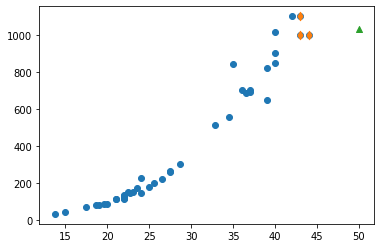

In [ ]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) #인덱스가 50인 농어 근처 이웃의 인덱스
plt.scatter(train_input, train_target) 

plt.scatter(train_input[indexes], train_target[indexes],marker='d')

plt.scatter(50, 1033, marker='^')#특정 농어의 데이터

plt.show()

In [ ]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict([[100]]))#knr.predict([[50]]) 이랑 값이 같음. 그 이유는 근처 이웃이 50과 같기 때문에

[1033.33333333]


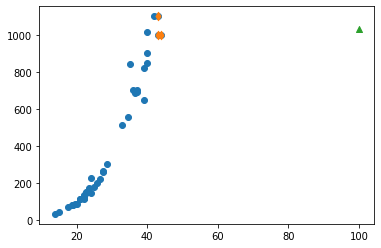

In [ ]:


distances, indexes = knr.kneighbors([[100]]) #인덱스가 100인 농어 근처 이웃의 인덱스
plt.scatter(train_input, train_target) 

plt.scatter(train_input[indexes], train_target[indexes],marker='d')

plt.scatter(100, 1033, marker='^')#특정 농어의 데이터

plt.show()

# Linear Regression 선형회귀

특성을 나타낼 수 있는 직선을 찾는 방법!

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


# Linear는 y=a*x+b

In [ ]:
print(lr.coef_, lr.intercept_)#a와 b 값을 저장

[39.01714496] -709.0186449535477


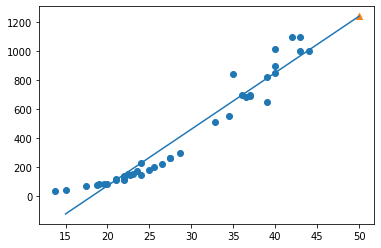

In [ ]:
plt.scatter(train_input, train_target)

plt.plot([15, 50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker="^")
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


모델이 1차 함수이다 보니 Underfitting이 발생한다.
# Polynomial Regression 다항회귀
 y=a*x^2+b*x+c

In [ ]:
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


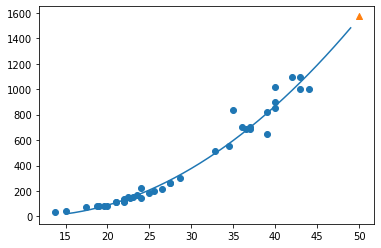

In [ ]:
point = np.arange(15,50) #x 좌표 값 연속으로 입력

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2+-21.6*point+116.05)

plt.scatter(50, 1574, marker="^")
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
